## Problem Statement

The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.The data set is imbalanced with 4521 instances and 17 columns.

 #### The dataset has the following attributes:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                    "blue-collar","self-employed","retired","technician","services") 

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

 Response Variable (desired target):__

17 - y - has the client subscribed to a __term deposit?__ (binary: "yes","no")

## Objective

The Objective of this analysis is to Predict who will do a Term Deposit in the Financial Institution

## Import all scientific and visualization packages

In [1]:
import pandas as pd                                                                                             # package to manipulate dataframe
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score       # Metrics to evaluate the model
import seaborn as sns                                                                                           # Visualization package
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier                                                             # Random Forest Classifier model
from sklearn.svm import SVC                                                                                     # Support Vector Classifier model
from sklearn.preprocessing import StandardScaler                                                                # For standardizing the dataset
import numpy as np

## Loading the dataset

In [2]:
df=pd.read_csv("Bank_Term_Deposit_Train.csv")  

In [3]:
pd.options.display.max_columns=None                                               # Allows us to view all the columns

In [4]:
# Checking the first 5 rows of the dataframe

df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df.shape  

(4413, 18)

In [6]:
del df['Unnamed: 0']        # Removing the first column

In [7]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4413 entries, 0 to 4412
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4413 non-null   int64 
 1   job        4413 non-null   object
 2   marital    4413 non-null   object
 3   education  4413 non-null   object
 4   default    4413 non-null   object
 5   balance    4413 non-null   int64 
 6   housing    4413 non-null   object
 7   loan       4413 non-null   object
 8   contact    4413 non-null   object
 9   day        4413 non-null   int64 
 10  month      4413 non-null   object
 11  duration   4413 non-null   int64 
 12  campaign   4413 non-null   int64 
 13  pdays      4413 non-null   int64 
 14  previous   4413 non-null   int64 
 15  poutcome   4413 non-null   object
 16  y          4413 non-null   object
dtypes: int64(7), object(10)
memory usage: 586.2+ KB


In [8]:
df.isnull().sum()        # Checking the missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# Find the total number of observations across all the classes given in Output var
df.y.value_counts() 

no     3904
yes     509
Name: y, dtype: int64

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000
mean,41.203716,1419.201224,15.921142,263.663494,2.800136,39.455472,0.537729
std,10.577605,3008.200835,8.252401,259.753338,3.124920,99.893990,1.689185
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,443.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1472.000000,21.000000,330.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## Data Visualization

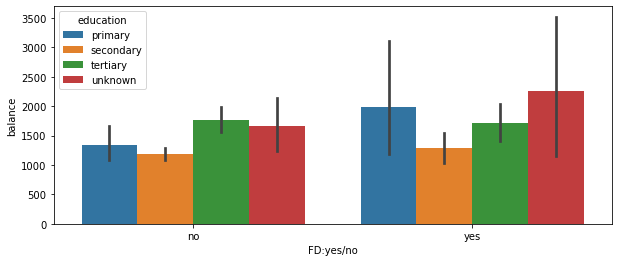

In [11]:
plt.figure(figsize=[10,4])                                      # Setting the size of the figure
sns.barplot(y=df['balance'],x=df['y'],hue=df.education)         # Bar plot
plt.xlabel("FD:yes/no")                                         # Setting the label in x axis
plt.show()                                                      # Displaying the plot

People who have term deposit have more balance in bank.<br>
This is because term deposit is a good investment scheme with high rate of interest.<br>
People who have term deposit are more educated.

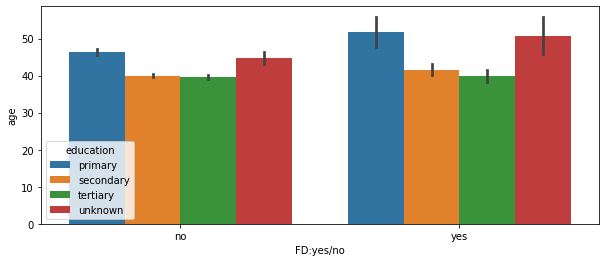

In [12]:
plt.figure(figsize=[10,4])                                        # Setting the size of the figure
sns.barplot(y=df['age'],x=df['y'],hue=df.education)               # Bar plot
plt.xlabel("FD:yes/no")                                           # Setting the label in x axis
plt.show()     

People who have term deposit have more age.  <br>
It can be deduced that aged people create term deposit to save their retirement benefit.

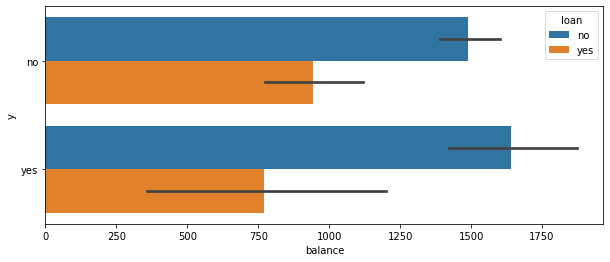

In [13]:
plt.figure(figsize=[10,4])                                           # Setting the size of the figure
sns.barplot(y=df['y'],x=df['balance'],hue=df.loan)                   # Bar plot
plt.show()

Those who have annual balance is close to 1500 euro and don't have loan are not doing Term Deposit. We should inspect more which factors are prohibiting them from doing a Term Deposit

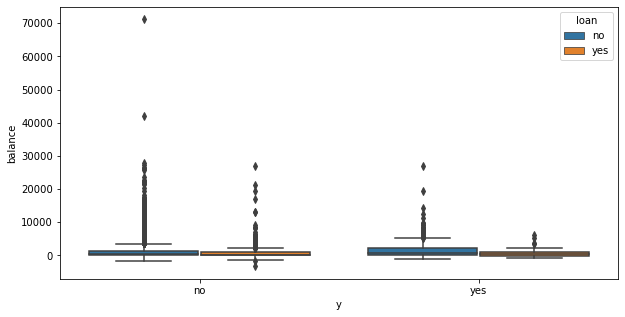

In [14]:
plt.figure(figsize=[10,5])                                           # Setting the size of the figure
sns.boxplot(x=df.y,y=df.balance,hue=df.loan)                         # Bar plot
plt.show()

We find some outliers in Annual balance in those who are not doing TD and having no loan

In [15]:
df[df.loan=='no'][df.y=='no'][df.balance>=1000][df.marital=='single'].shape[0] # 293 people having no loan,single and annual
# greater than equal to 1000 are not doing Term Deposit.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


293

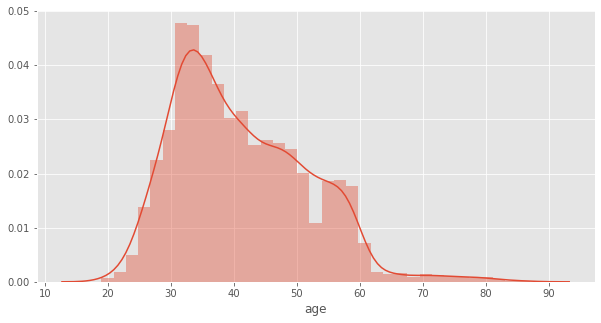

In [16]:
# Distribution plot of Age

from matplotlib import style
plt.figure(figsize=[10,5])
style.use('ggplot')
sns.distplot(df['age'])
plt.show()

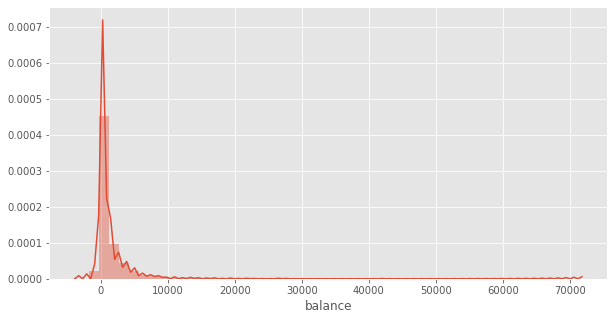

In [17]:
# Distribution plot of balance

from matplotlib import style
plt.figure(figsize=[10,5])
style.use('ggplot')
sns.distplot(df['balance'])
plt.show()

Balance variable is highly skewed to the right. Max number of people having low annual balance

In [18]:
df.y.value_counts() 

no     3904
yes     509
Name: y, dtype: int64

In [19]:
no=df['y']=='no'#.size()
no=no.sum()
yes=df['y']=='yes'
yes=yes.sum()

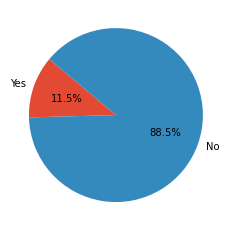

In [20]:
# Pie chart of both the classes

plt.figure(figsize=[4,4])
variables=['Yes','No']
values=[yes,no]
plt.pie(values,labels=variables,autopct='%1.1f%%', startangle=140)
plt.show()

In [21]:
# Creating the features and the labels

y=df['y']
X=df.drop(['y'],1)

In [22]:
x=X.copy()

In [23]:
df.shape 

(4413, 17)

In [24]:
# Getting the dummy values of job, marital, education, default, House, Loan, Contract, Month, poutcome

job_dummies=pd.get_dummies(X['job'],prefix='Job',drop_first=True)
marital_dummies=pd.get_dummies(X['marital'],prefix='Marital',drop_first=True)
edu_dummies=pd.get_dummies(X['education'],prefix='Edu',drop_first=True)
default_dummies=pd.get_dummies(X['default'],prefix='Default',drop_first=True)
housing_dummies=pd.get_dummies(X['housing'],prefix='House',drop_first=True)
loan_dummies=pd.get_dummies(X['loan'],prefix='Loan',drop_first=True)
contact_dummies=pd.get_dummies(X['contact'],prefix='Contact',drop_first=True)
month_dummies=pd.get_dummies(X['month'],prefix='Month',drop_first=True)
poutcome_dummies=pd.get_dummies(X['poutcome'],prefix='poutcome',drop_first=True)

In [25]:
# Merge all the dummified categorical columns

X=pd.concat([X,job_dummies,marital_dummies,edu_dummies,default_dummies,housing_dummies,loan_dummies,
             contact_dummies,month_dummies,poutcome_dummies],1)

In [26]:
# Removing the non-dummified categorical columns

X=X.drop(['job','marital','education','default','housing','loan','month','poutcome','contact'],axis=1)
X.shape

(4413, 42)

In [27]:
y.shape

(4413,)

In [28]:
X.shape

(4413, 42)

## Convert response variable into numeric one

In [29]:
# Label Encoding the y variable

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [30]:
y=le.fit_transform(y)

In [31]:
pd.crosstab(y,'Count')                            # This shows that the dataset is imbalanced and we need to perform SMOTE

col_0,Count
row_0,
0,3904
1,509


In [32]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Edu_secondary,Edu_tertiary,Edu_unknown,Default_yes,House_yes,Loan_yes,Contact_telephone,Contact_unknown,Month_aug,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## Handle imbalanced data using SMOTE

SMOTE is done for imbalanced data set.<br>
We'll do over-sampling thus we can increase the number of instances while balancing the dataset

In [33]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_sample(X,y)

In [34]:
print(x_sm.shape)
print(y_sm.shape)

(7808, 42)
(7808,)


In [35]:
# Splitting the data into train and test set and checking their shape

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.20,random_state=12)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6246, 42)
(1562, 42)
(6246,)
(1562,)


In [36]:
pd.Series(y_sm).value_counts()                          # After SMOTE the classes are balanced

1    3904
0    3904
dtype: int64

In [37]:
pd.Series(y_test).value_counts()

1    809
0    753
dtype: int64

In [38]:
import lightgbm as lgb

In [39]:
train_data = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003                      # Learning rate 
params['boosting_type'] = 'gbdt'                     # Gradient Boosting Decision Tree
params['objective'] = 'binary'                       # Classify into binary classes
params['metric'] = 'binary_logloss'                  # metric is binary logloss
params['sub_feature'] = 0.5
params['num_leaves'] = 15                            # number of leaves in a full tree
params['min_data'] = 50                              # minimum number of data in the last leaf 
params['max_depth'] = 10                             # depth of tree
clf = lgb.train(params, train_data, 100)             # Train the model for 100 iteration

### Prediction train data

In [40]:
train_pred = clf.predict(x_train)

### Prediction on test data

In [41]:
lightgbm_pred=clf.predict(x_test)

In [42]:

#convert into binary values
for i in range(0,6246):         # 6246 is the number of records
    if train_pred[i]>=.5:       # setting threshold to .5
       train_pred[i]=1
    else:  
       train_pred[i]=0

### Train performance

In [43]:
print(accuracy_score(y_train, train_pred))            # Accuracy of the model

0.9047390329811079


In [44]:
print(classification_report(y_train, train_pred)) 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3151
           1       0.92      0.88      0.90      3095

    accuracy                           0.90      6246
   macro avg       0.91      0.90      0.90      6246
weighted avg       0.91      0.90      0.90      6246



### Validation performance

In [45]:
y_pred=clf.predict(x_test)
#convert into binary values
for i in range(0,1562):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [46]:
y_pred

array([0., 1., 0., ..., 0., 1., 0.])

In [47]:
# Checking all the metrics for the Test data

print(confusion_matrix(y_test, y_pred))                                # Print confusion matrix

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)

print('accuracy_score \n',accuracy_score(y_test,y_pred))

print('classification_report \n',classification_report(y_test,y_pred))

[[701  52]
 [ 93 716]]
accuracy_score 
 0.9071702944942381
classification_report 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       753
           1       0.93      0.89      0.91       809

    accuracy                           0.91      1562
   macro avg       0.91      0.91      0.91      1562
weighted avg       0.91      0.91      0.91      1562



In [48]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8850432632880099

### Prediction for upcoming four days

### Day 1 prediction

Import Day 1 data

We have received Day1 data(Input)<br>

Import day1_input

In [49]:
day1_input_df=pd.read_csv('Day1_input.xls')

In [50]:
day1_input_df.shape            # Rows and columns

(27, 16)

In [51]:
day1_input_df.tail()           # Check the last 5 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22,60,admin.,married,unknown,no,1088,yes,no,cellular,26,may,149,1,-1,0,unknown
23,37,technician,single,secondary,no,228,yes,no,cellular,20,aug,1740,2,-1,0,unknown
24,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown
25,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown
26,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown


### Feature Engineering the data from Day 1

In [52]:
new_input_features=x.append(day1_input_df)    # Add the last 5 days to train data

In [53]:
new_input_features.tail()                     # Check the last 5 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22,60,admin.,married,unknown,no,1088,yes,no,cellular,26,may,149,1,-1,0,unknown
23,37,technician,single,secondary,no,228,yes,no,cellular,20,aug,1740,2,-1,0,unknown
24,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown
25,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown
26,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown


In [54]:
# Dummify categorical features 

job_dummies1=pd.get_dummies(new_input_features['job'],prefix='Job',drop_first=True)
marital_dummies1=pd.get_dummies(new_input_features['marital'],prefix='Marital',drop_first=True)
edu_dummies1=pd.get_dummies(new_input_features['education'],prefix='Edu',drop_first=True)
default_dummies1=pd.get_dummies(new_input_features['default'],prefix='Default',drop_first=True)
housing_dummies1=pd.get_dummies(new_input_features['housing'],prefix='House',drop_first=True)
loan_dummies1=pd.get_dummies(new_input_features['loan'],prefix='Loan',drop_first=True)
contact_dummies1=pd.get_dummies(new_input_features['contact'],prefix='Contact',drop_first=True)
month_dummies1=pd.get_dummies(new_input_features['month'],prefix='Month',drop_first=True)
poutcome_dummies1=pd.get_dummies(new_input_features['poutcome'],prefix='poutcome',drop_first=True)

In [55]:
new_input_features=pd.concat([new_input_features,job_dummies1,marital_dummies1,edu_dummies1,default_dummies1,
                              housing_dummies1,loan_dummies1,contact_dummies1,month_dummies1,poutcome_dummies1],1)

In [56]:
new_input_features=new_input_features.drop(['job','marital','education','default','housing','loan','month',
                                            'poutcome','contact'],axis=1)

In [57]:
new_input_features.shape

(4440, 42)

In [58]:
# Removing the last 27 rows from the Day 1 data

onehot_encoded_new_input_features_day1=new_input_features.iloc[-27:,:]

In [59]:
onehot_encoded_new_input_features_day1.shape

(27, 42)

### Predicting day1 data

In [60]:
day1_pred=clf.predict(onehot_encoded_new_input_features_day1)

In [61]:
for i in range(0,27):
    if day1_pred[i]>=.5:       # setting threshold to .5
       day1_pred[i]=1
    else:  
       day1_pred[i]=0

We have received actual what happend on day1(Actual day1_output)

In [62]:
day1_actual_output=pd.read_csv('Day1_Actual_output.xls')

In [63]:
day1_actual_output=le.fit_transform(day1_actual_output)

C:\Users\Nikhil Jain\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [64]:
print(classification_report(day1_actual_output,day1_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        24
           1       0.43      1.00      0.60         3

    accuracy                           0.85        27
   macro avg       0.71      0.92      0.75        27
weighted avg       0.94      0.85      0.87        27



In [65]:
print(confusion_matrix(day1_actual_output,day1_pred))

[[20  4]
 [ 0  3]]


In [66]:
day1_recall=recall_score(day1_actual_output,day1_pred)
day1_recall

1.0

Data of Day 2 prediction<br>
We have received Day2 data(Input)<br>

Import day2_input

In [67]:
day2_input_df=pd.read_csv('Day2_input.xls')

In [68]:
day2_input_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22,58,retired,married,primary,no,3401,yes,no,cellular,3,feb,84,3,265,2,failure
23,57,retired,married,primary,no,808,no,no,telephone,7,jul,274,1,-1,0,unknown
24,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown
25,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown
26,32,blue-collar,married,secondary,no,2089,yes,no,cellular,14,nov,132,1,-1,0,unknown


In [69]:
day2_input_df.shape

(27, 16)

### Feature Engineering for Day 2

In [70]:
new_input_features1=x.append(day2_input_df)

In [71]:
new_input_features1.shape

(4440, 16)

In [72]:
job_dummies2=pd.get_dummies(new_input_features1['job'],prefix='Job',drop_first=True)
marital_dummies2=pd.get_dummies(new_input_features1['marital'],prefix='Marital',drop_first=True)
edu_dummies2=pd.get_dummies(new_input_features1['education'],prefix='Edu',drop_first=True)
default_dummies2=pd.get_dummies(new_input_features1['default'],prefix='Default',drop_first=True)
housing_dummies2=pd.get_dummies(new_input_features1['housing'],prefix='House',drop_first=True)
loan_dummies2=pd.get_dummies(new_input_features1['loan'],prefix='Loan',drop_first=True)
contact_dummies2=pd.get_dummies(new_input_features1['contact'],prefix='Contact',drop_first=True)
month_dummies2=pd.get_dummies(new_input_features1['month'],prefix='Month',drop_first=True)
poutcome_dummies2=pd.get_dummies(new_input_features1['poutcome'],prefix='poutcome',drop_first=True)

In [73]:
new_input_features1=pd.concat([new_input_features1,job_dummies2,marital_dummies2,edu_dummies2,default_dummies2,housing_dummies2,loan_dummies2,contact_dummies2,month_dummies2,poutcome_dummies2],1)

In [74]:
new_input_features1.shape

(4440, 51)

In [75]:
new_input_features1=new_input_features1.drop(['job','marital','education','default','housing','loan','month','poutcome','contact'],axis=1)

In [76]:
new_input_features1.shape

(4440, 42)

In [77]:
new_input_features1.tail()

,age,balance,day,duration,campaign,pdays,previous,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Edu_secondary,Edu_tertiary,Edu_unknown,Default_yes,House_yes,Loan_yes,Contact_telephone,Contact_unknown,Month_aug,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,poutcome_other,poutcome_success,poutcome_unknown
22,58,3401,3,84,3,265,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
23,57,808,7,274,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
24,49,1235,13,354,3,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
25,78,229,22,97,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
26,32,2089,14,132,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [78]:
onehot_encoded_new_input_features_day2=new_input_features1.iloc[-27:,:]

In [79]:
onehot_encoded_new_input_features_day2.shape

(27, 42)

In [80]:
day2_pred=clf.predict(onehot_encoded_new_input_features_day2)

In [81]:
for i in range(0,27):
    if day2_pred[i]>=.5:       # setting threshold to .5
       day2_pred[i]=1
    else:  
       day2_pred[i]=0

We have received actual what happend on day2(Actual day2_output)

In [82]:
day2_Actual_output=pd.read_csv('Day2_Actual_output.xls')

In [83]:
day2_actual_output=le.fit_transform(day2_Actual_output)

C:\Users\Nikhil Jain\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [84]:
print(classification_report(day2_actual_output,day2_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.33      0.33      0.33         3

    accuracy                           0.85        27
   macro avg       0.62      0.62      0.62        27
weighted avg       0.85      0.85      0.85        27



In [85]:
print(confusion_matrix(day2_actual_output,day2_pred))

[[22  2]
 [ 2  1]]


In [86]:
day2_recall=recall_score(day2_actual_output,day2_pred)
day2_recall

0.3333333333333333

Prediction for Day 3<br>
We have received Day3 data(Input)<br>

Import day3_input

In [87]:
day3_input_df=pd.read_csv('Day3_input.xls')

In [88]:
day3_input_df.shape

(27, 16)

In [89]:
day3_input_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22,58,unemployed,married,secondary,no,610,yes,no,telephone,29,jul,246,2,-1,0,unknown
23,34,admin.,married,tertiary,no,35,yes,no,cellular,15,oct,76,1,69,2,failure
24,33,management,married,secondary,no,3935,yes,no,cellular,6,may,765,1,342,2,failure
25,61,admin.,married,unknown,no,4629,yes,no,cellular,27,jan,181,1,92,1,success
26,45,blue-collar,divorced,primary,no,844,no,no,unknown,5,jun,1018,3,-1,0,unknown


### Feature Engineering for Day 3

In [90]:
new_input_features2=x.append(day3_input_df)

In [91]:
new_input_features2.shape

(4440, 16)

In [92]:
job_dummies3=pd.get_dummies(new_input_features2['job'],prefix='Job',drop_first=True)
marital_dummies3=pd.get_dummies(new_input_features2['marital'],prefix='Marital',drop_first=True)
edu_dummies3=pd.get_dummies(new_input_features2['education'],prefix='Edu',drop_first=True)
default_dummies3=pd.get_dummies(new_input_features2['default'],prefix='Default',drop_first=True)
housing_dummies3=pd.get_dummies(new_input_features2['housing'],prefix='House',drop_first=True)
loan_dummies3=pd.get_dummies(new_input_features2['loan'],prefix='Loan',drop_first=True)
contact_dummies3=pd.get_dummies(new_input_features2['contact'],prefix='Contact',drop_first=True)
month_dummies3=pd.get_dummies(new_input_features2['month'],prefix='Month',drop_first=True)
poutcome_dummies3=pd.get_dummies(new_input_features2['poutcome'],prefix='poutcome',drop_first=True)

In [93]:
new_input_features2=pd.concat([new_input_features2,job_dummies3,marital_dummies3,edu_dummies3,default_dummies3,
                               housing_dummies3,loan_dummies3,contact_dummies3,month_dummies3,poutcome_dummies3],1)

In [94]:
new_input_features2=new_input_features2.drop(['job','marital','education','default','housing','loan',
                                              'month','poutcome','contact'],axis=1)

In [95]:
new_input_features2.shape

(4440, 42)

In [96]:
onehot_encoded_new_input_features_day3=new_input_features2.iloc[-27:,:]

In [97]:
onehot_encoded_new_input_features_day3.tail()

,age,balance,day,duration,campaign,pdays,previous,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Edu_secondary,Edu_tertiary,Edu_unknown,Default_yes,House_yes,Loan_yes,Contact_telephone,Contact_unknown,Month_aug,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,poutcome_other,poutcome_success,poutcome_unknown
22,58,610,29,246,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
23,34,35,15,76,1,69,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
24,33,3935,6,765,1,342,2,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
25,61,4629,27,181,1,92,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
26,45,844,5,1018,3,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [98]:
onehot_encoded_new_input_features_day3.shape

(27, 42)

Predicting day 3 data<br>
We have received data of day 3(Input features) and we will predict the labels using clf model

In [99]:
day3_pred=clf.predict(onehot_encoded_new_input_features_day3)

In [100]:
for i in range(0,27):
    if day3_pred[i]>=.5:       # setting threshold to .5
       day3_pred[i]=1
    else:  
       day3_pred[i]=0

We have received actual what happend on day3(Actual day3_output)

In [101]:
day3_Actual_output=pd.read_csv('Day3_Actual_output.xls')

In [102]:
day3_Actual_output=le.fit_transform(day3_Actual_output)
pd.crosstab(day3_Actual_output,'count')

C:\Users\Nikhil Jain\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


col_0,count
row_0,
0,24
1,3


In [105]:
print(classification_report(day3_Actual_output,day3_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.00      0.00      0.00         3

    accuracy                           0.85        27
   macro avg       0.44      0.48      0.46        27
weighted avg       0.79      0.85      0.82        27



In [106]:
day3_recall=recall_score(day3_Actual_output,day3_pred)
day3_recall

0.0

In [107]:
print(confusion_matrix(day3_Actual_output,day3_pred))

[[23  1]
 [ 3  0]]


Prediction for Day 4<br>
Predicting day 4 data<br>

We have received data of day 4(Input features) and we will predict the labels using clf model

In [108]:
day4_input_df=pd.read_csv('Day4_input.xls')

In [109]:
day4_input_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22,39,admin.,divorced,secondary,no,83,yes,no,cellular,30,jul,69,6,-1,0,unknown
23,59,admin.,married,secondary,no,817,no,no,cellular,9,apr,304,1,-1,0,unknown
24,34,technician,married,tertiary,no,1539,yes,no,cellular,15,jun,441,1,56,1,other
25,37,management,married,tertiary,no,0,no,no,cellular,16,jul,268,2,182,3,success
26,27,admin.,divorced,secondary,no,451,yes,no,cellular,16,jul,652,1,-1,0,unknown


In [110]:
day4_input_df.shape

(27, 16)

### Feature Engineering for Day 4

In [111]:
new_input_features3=x.append(day4_input_df)

In [112]:
new_input_features3.shape

(4440, 16)

In [113]:
job_dummies4=pd.get_dummies(new_input_features3['job'],prefix='Job',drop_first=True)
marital_dummies4=pd.get_dummies(new_input_features3['marital'],prefix='Marital',drop_first=True)
edu_dummies4=pd.get_dummies(new_input_features3['education'],prefix='Edu',drop_first=True)
default_dummies4=pd.get_dummies(new_input_features3['default'],prefix='Default',drop_first=True)
housing_dummies4=pd.get_dummies(new_input_features3['housing'],prefix='House',drop_first=True)
loan_dummies4=pd.get_dummies(new_input_features3['loan'],prefix='Loan',drop_first=True)
contact_dummies4=pd.get_dummies(new_input_features3['contact'],prefix='Contact',drop_first=True)
month_dummies4=pd.get_dummies(new_input_features3['month'],prefix='Month',drop_first=True)
poutcome_dummies4=pd.get_dummies(new_input_features3['poutcome'],prefix='poutcome',drop_first=True)

In [114]:
new_input_features3=pd.concat([new_input_features3,job_dummies4,marital_dummies4,edu_dummies4,default_dummies4,
                               housing_dummies4,loan_dummies4,contact_dummies4,month_dummies4,poutcome_dummies4],1)

In [115]:
new_input_features3=new_input_features3.drop(['job','marital','education','default','housing','loan',
                                              'month','poutcome','contact'],axis=1)

In [116]:
new_input_features3.shape

(4440, 42)

In [117]:
onehot_encoded_new_input_features_day4=new_input_features3.iloc[-27:,:]

In [118]:
onehot_encoded_new_input_features_day4.tail()

,age,balance,day,duration,campaign,pdays,previous,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Edu_secondary,Edu_tertiary,Edu_unknown,Default_yes,House_yes,Loan_yes,Contact_telephone,Contact_unknown,Month_aug,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,poutcome_other,poutcome_success,poutcome_unknown
22,39,83,30,69,6,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
23,59,817,9,304,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24,34,1539,15,441,1,56,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
25,37,0,16,268,2,182,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
26,27,451,16,652,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Predicting day 4 data We have received data of day 4(Input features) and we will predict the labels using clf model

In [119]:
day4_pred=clf.predict(onehot_encoded_new_input_features_day4)

In [120]:
for i in range(0,27):
    if day4_pred[i]>=.5:       # setting threshold to .5
       day4_pred[i]=1
    else:  
       day4_pred[i]=0

We have received actual what happend on day3(Actual day3_output)

In [121]:
day4_actual_output=pd.read_csv('Day4_Actual_output.xls')

In [122]:
day4_actual_output=le.fit_transform(day4_actual_output)
pd.crosstab(day4_actual_output,'count')

C:\Users\Nikhil Jain\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


col_0,count
row_0,
0,24
1,3


In [123]:
print(classification_report(day4_actual_output,day4_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.75      1.00      0.86         3

    accuracy                           0.96        27
   macro avg       0.88      0.98      0.92        27
weighted avg       0.97      0.96      0.97        27



In [124]:
day4_recall=recall_score(day4_actual_output,day4_pred)
day4_recall

1.0

In [125]:
print(confusion_matrix(day4_actual_output,day4_pred))

[[23  1]
 [ 0  3]]


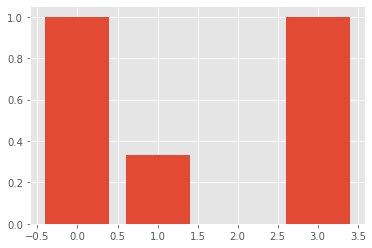

In [126]:
all_recall = [day1_recall, day2_recall, day3_recall, day4_recall]

a=range(0,4)
plt.bar(a,all_recall)
plt.show()

### Retrain the model with day 1,2,3 and 4 data

In [127]:
import numpy as np

In [128]:
retrain_X=pd.concat([X,onehot_encoded_new_input_features_day1,onehot_encoded_new_input_features_day2,
                    onehot_encoded_new_input_features_day3,onehot_encoded_new_input_features_day4],axis=0)

In [129]:
Y=np.concatenate((y,day1_actual_output,day2_actual_output,day3_Actual_output,day4_actual_output),axis=0)

In [130]:
Y.shape

(4521,)

In [131]:
retrain_X.shape

(4521, 42)

In [132]:
smote=SMOTE(sampling_strategy='minority')
X_sm,Y_sm=smote.fit_sample(retrain_X,Y)

In [133]:
X_train,X_test,Y_train,Y_test=train_test_split(X_sm,Y_sm,test_size=0.20,random_state=1234)

In [134]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6400, 42)
(1600, 42)
(6400,)
(1600,)


In [135]:
d_train = lgb.Dataset(X_train, label=Y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 15
params['min_data'] = 50
params['max_depth'] = 10
clf1 = lgb.train(params, d_train, 100)

In [136]:
final_y_pred=clf1.predict(X_test)

In [137]:
for i in range(0,1600):
    if final_y_pred[i]>=0.5:
       final_y_pred[i]=1
    else:
       final_y_pred[i]=0

In [138]:
print('Accuracy\n',accuracy_score(Y_test,final_y_pred))

Accuracy
 0.905625


In [139]:
print('classification_report\n',classification_report(Y_test,final_y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       801
           1       0.90      0.91      0.91       799

    accuracy                           0.91      1600
   macro avg       0.91      0.91      0.91      1600
weighted avg       0.91      0.91      0.91      1600



In [140]:
print('confusion_matrix\n',confusion_matrix(Y_test,final_y_pred))

confusion_matrix
 [[723  78]
 [ 73 726]]


### Compare Recall_score of final model with previous one

In [141]:
print(recall_score(y_test,y_pred))  # First model

0.8850432632880099


In [142]:
print(recall_score(Y_test,final_y_pred))  # Final model

0.9086357947434293


An improvement in recall score is obsevered in the final model built on the entire data Thus we can retrain our existing model to find performance of the model on more data

### Training a Random Forest Classifier on the entire data

In [143]:
rf=RandomForestClassifier() # Define the classifier

In [144]:
rf_model=rf.fit(X_train,Y_train)
rf_train_pred=rf_model.predict(X_train)
print(accuracy_score(Y_train,rf_train_pred))

1.0


#### Validate the model on validation data

In [145]:
rf_test_pred=rf_model.predict(X_test)
print(accuracy_score(rf_test_pred,Y_test))

0.936875


In [146]:
print(confusion_matrix(Y_test,rf_test_pred))
print('classification_report \n',classification_report(rf_test_pred,Y_test))

[[760  41]
 [ 60 739]]
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       820
           1       0.92      0.95      0.94       780

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600



#### Recall score of RandomForest model

In [147]:
rf_recall=recall_score(rf_test_pred,Y_test)
rf_recall

0.9474358974358974

#### Recall Score of LightGBM model

In [148]:
lightGBM_recall=recall_score(Y_test,final_y_pred)
lightGBM_recall

0.9086357947434293

We can conclude that the performance of Random forest is better than LightGBM in terms of all the classification performance metrics

## Let's find ROC-AUC score and curve of Random forest model

In [149]:
predict_probabilities = rf_model.predict_proba(X_test)[:,1]

In [150]:
ROCAUC=roc_auc_score(Y_test,rf_test_pred)
ROCAUC

0.9368600575938401

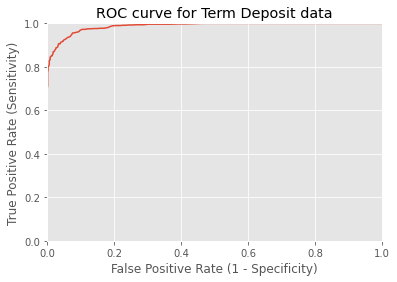

In [151]:
fpr, tpr, thresholds = roc_curve(Y_test, predict_probabilities)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Term Deposit data')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

Scaling is required because attributes values given are in different scales